<a href="https://colab.research.google.com/github/kkewat/Computer-vision/blob/main/StockPricePredictionUsingRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('MSFT.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [5]:
df.shape

(9083, 7)

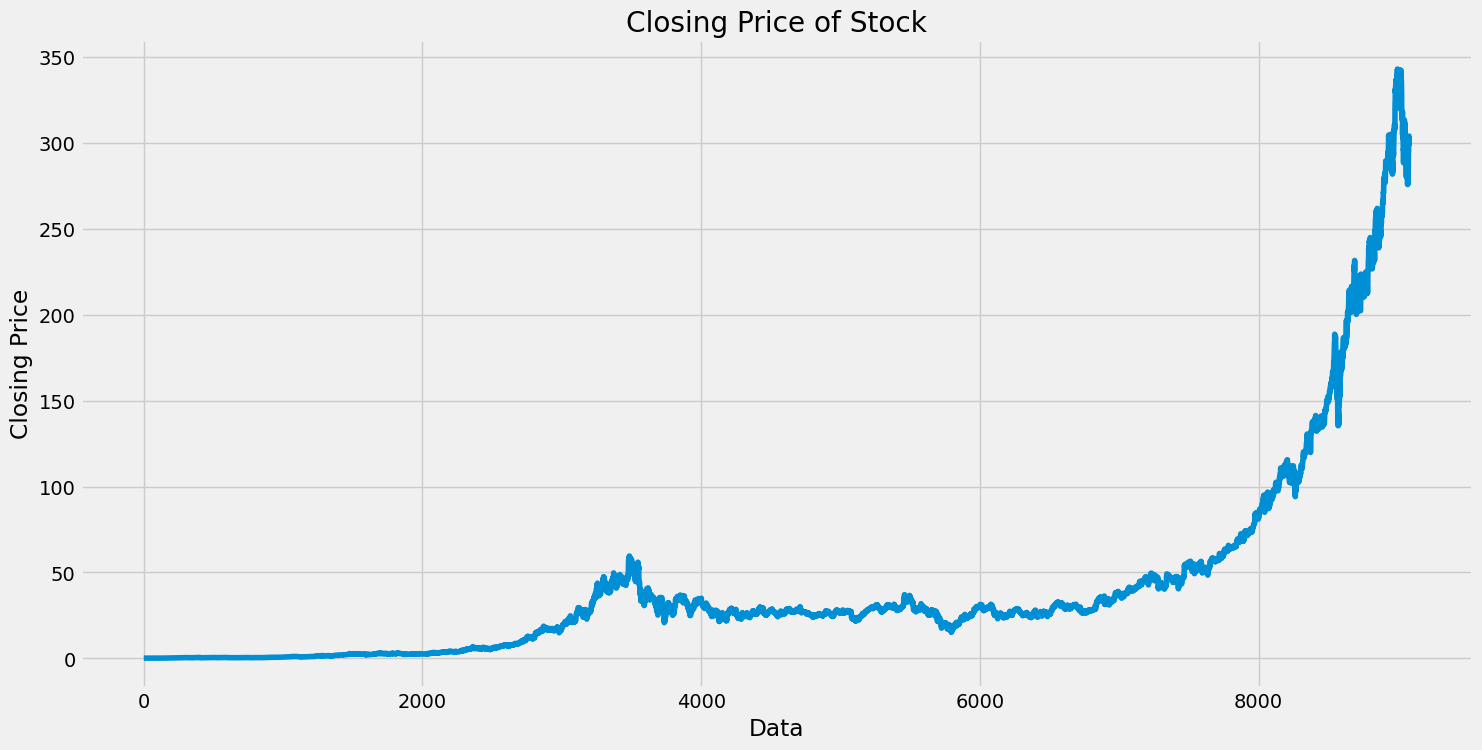

In [7]:
#Plotting the Stock
plt.figure(figsize=(16,8))
plt.title('Closing Price of Stock')
plt.plot(df['Close'])
plt.xlabel('Data')
plt.ylabel('Closing Price')
plt.show()

In [9]:
#creating new data with only required columns
data = df.filter(['Close'])
#Convert it to numpy array
dataset = data.values
#get the number of rows to train 80%
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

7267

In [10]:
#Scaling The Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
print('Mean Of the Processed Dataa = ',scaled_data.mean())
print('Standard Deviation of the Processed Data = ',scaled_data.std())

Mean Of the Processed Dataa =  1.0013153162753806e-16
Standard Deviation of the Processed Data =  1.0


In [11]:
#Create the train Data
train_data = scaled_data[0:training_data_len, :]
#Splitting the data in x_train and y_train
x_train = []
y_train = []
for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [14]:
#convert x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(7207, 60, 1)

In [18]:
#reshape the data
print('x_train shape before reshaping',x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print('x_train shape after reshaping',x_train.shape)

x_train shape before reshaping (7207, 60, 1)
x_train shape after reshaping (7207, 60, 1)


Building the Model

In [19]:
#build the LSTM moodel
model = Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

In [20]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507601 (1.94 MB)
Trainable params: 507601 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
226/226 [==============================] - 66s 270ms/step - loss: 0.0022
Epoch 2/10
226/226 [==============================] - 62s 276ms/step - loss: 2.5318e-04
Epoch 3/10
226/226 [==============================] - 61s 270ms/step - loss: 2.3591e-04
Epoch 4/10
226/226 [==============================] - 61s 271ms/step - loss: 1.8975e-04
Epoch 5/10
226/226 [==============================] - 62s 273ms/step - loss: 1.7508e-04
Epoch 6/10
226/226 [==============================] - 64s 282ms/step - loss: 1.7049e-04
Epoch 7/10
226/226 [==============================] - 62s 276ms/step - loss: 1.6453e-04
Epoch 8/10
226/226 [==============================] - 60s 267ms/step - loss: 1.4206e-04
Epoch 9/10
226/226 [==============================] - 61s 269ms/step - loss: 1.1664e-04
Epoch 10/10
226/226 [==============================] - 62s 274ms/step - loss: 1.1938e-04


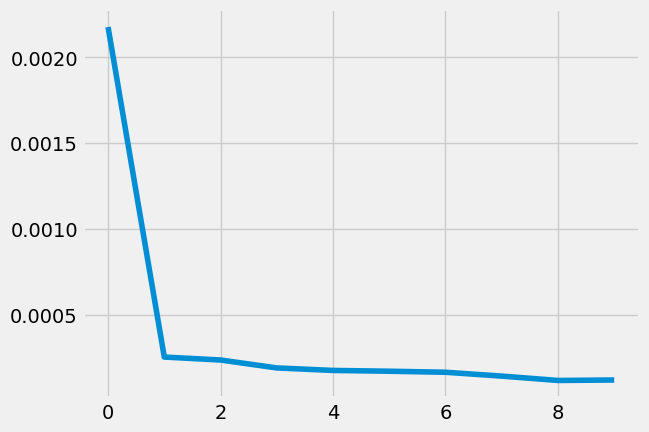

In [24]:
plt.plot(history.history['loss'])

In [25]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [26]:
x_test = np.array(x_test)

In [27]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [28]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions)

57/57 [==============================] - 7s 95ms/step
[[ 46.10857 ]
 [ 47.00875 ]
 [ 47.423954]
 ...
 [282.51343 ]
 [285.07425 ]
 [284.84277 ]]
